## 大数定理与中心极限定理

### 大数定理

#### 大数定理的模拟

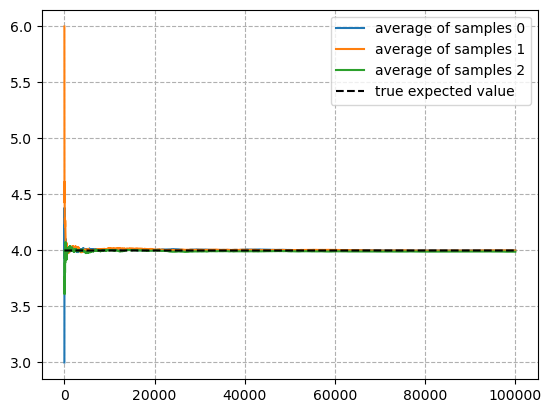

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom


n = 10
p = 0.4
E = n*p
sample_size = 99999
est_sample_size = range(1, sample_size, 10)

for i in range(3):
    binom_RV = binom(n=n, p=p)
    X = binom_RV.rvs(size=sample_size)
    sample_ave = [X[:j].mean() for j in est_sample_size]
    plt.plot(est_sample_size, sample_ave, label='average of samples {}'.format(i))
    
plt.plot(est_sample_size, E*np.ones_like(sample_ave), ls='--', c='k', label='true expected value')
# 这里用E*np.ones_like(sample_ave)这个写法，可以关注一下，因为同样是要输入一个数组进去

plt.legend(loc='best')
plt.grid(ls='--')
plt.show()

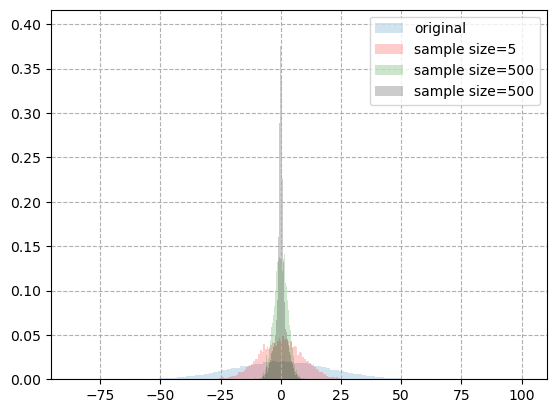

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


norm_RV = norm(loc=0, scale=20)
X = norm_RV.rvs(size=100000)
plt.hist(X, density=True, bins=100, alpha=0.2, label='original')

mean = []
for i in range(10000):
    sample = np.random.choice(X, size=5, replace=False)
    mean.append(np.mean(sample))
plt.hist(mean, density=True, bins=100, alpha=0.2, label='sample size=5', color = 'r')

mean = []
for i in range(10000):
    sample = np.random.choice(X, size=50, replace=False)
    mean.append(np.mean(sample))
plt.hist(mean, density=True, bins=100, alpha=0.2, label='sample size=500', color = 'g')

for i in range(10000):
    sample = np.random.choice(X, size=1000, replace=False)
    mean.append(np.mean(sample))
plt.hist(mean, density=True, bins=100, alpha=0.2, label='sample size=500', color = 'k')


plt.grid(ls='--')
plt.legend(loc='best')
plt.show()

#### 大数定理的应用——蒙特卡洛法估计不规则图形面积

In [21]:
import numpy as np
from scipy.stats import uniform


r = 1
O_x = 0
O_y = 0

rvs_x = uniform(O_x - r, 2 * r).rvs(size=9999999)
rvs_y = uniform(O_x - r, 2 * r).rvs(size=9999999)

dis_arraay = np.sqrt((rvs_x - 0) ** 2 + (rvs_y - 0) ** 2)
in_circle  = np.sum(np.where(dis_arraay < 1, 1, 0))

S = in_circle / 9999999 # 用点落在不同图形里面的比例来替换面积表达式，是蒙特卡洛方法的一种基本应用
pi = S * 4 # 这个其实就是圆面积和pi的转换公式

print(S, pi)

0.7855189785518979 3.1420759142075916


### 中心极限定理

#### 中心极限定理的模拟

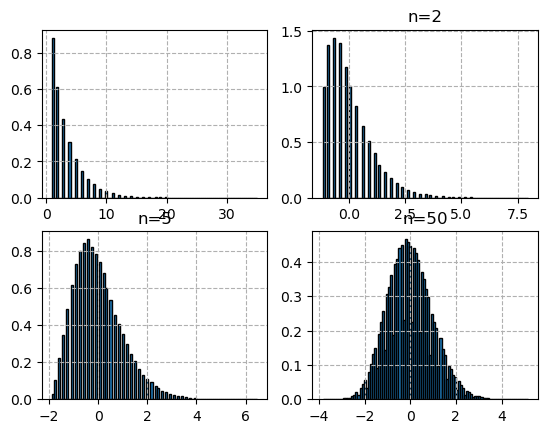

In [20]:
import numpy as np
from scipy.stats import geom
import matplotlib.pyplot as plt


fig, ax = plt.subplots(2, 2)

geom_RV = geom(p=0.3)
X = geom_RV.rvs(size=100000)
mean, var = geom_RV.stats('mv')

ax[0, 0].hist(X, density=True, bins=100, edgecolor='k')
ax[0, 0].grid(ls='--')

sample_size = [0, 2, 5, 50]

for i in range(1, 4):
    number_samples = sample_size[i]
    samples = []
    for j in range(100000):
        sample = np.random.choice(X, number_samples)
        samples.append((sum(sample) - number_samples * mean) / np.sqrt(number_samples * var))
    
    ax[i // 2, i % 2].hist(samples, density=True, bins=100, edgecolor='k')
    ax[i // 2, i % 2].set_title('n={}'.format(number_samples))
    ax[i // 2, i % 2].grid(ls='--')

## 统计推断

### 有偏估计量与无偏估计量

#### 为什么样本均值是总体均值的无偏估计量

-2.82483764326082e-05


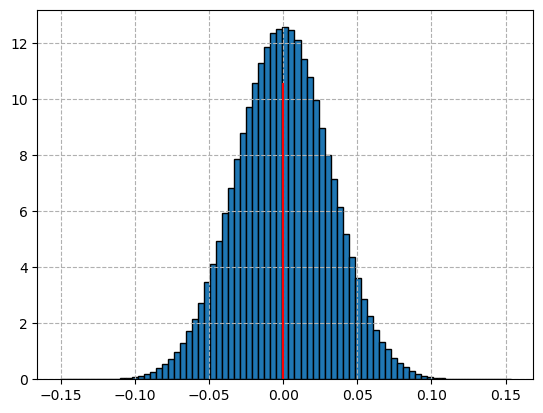

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


norm_RV = norm(loc=0, scale=1)

sample_size = 1000
X_bar_array = []

for i in range(1000000):
    x = norm_RV.rvs(size=sample_size)
    x_bar = np.mean(x)
    X_bar_array.append(x_bar)
    
plt.hist(X_bar_array, density=True, edgecolor='k', bins=75)
plt.axvline(0, ymax=0.8, color='r')
plt.grid(ls='--')

print(np.mean(X_bar_array))
# 用均值来估计期望，可以发现期望和真实值0非常接近

#### 为什么样本方差不是一个无偏估计量

0.9901639164525987


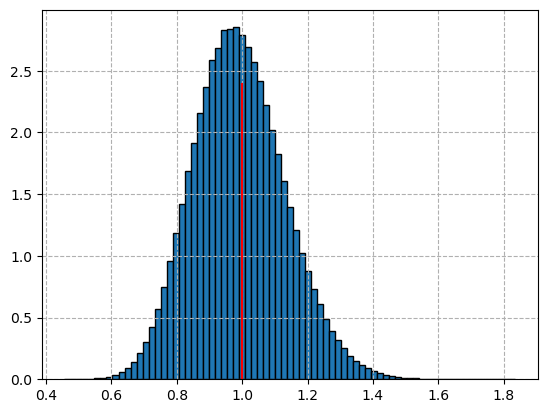

In [7]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


norm_RV = norm(loc=0, scale=1)

sample_size = 100
S2_array = []

for i in range(1000000):
    x = norm_RV.rvs(size=sample_size)
    x_bar = np.mean(x)
    s2 = np.sum(np.square(x - x_bar)) / float(sample_size)
    S2_array.append(s2)
    
plt.hist(S2_array, density=True, edgecolor='k', bins=75)
plt.axvline(1, ymax=0.8, color='r')
plt.grid(ls='--')

print(np.mean(S2_array))
# 用均值来估计期望，可以发现期望与真实值存在一定的差距，0.009多

### 极大似然估计

#### 3枚硬币的例子

In [14]:
from scipy.special import comb
import math


# comb就是求组合数，math.pow就是返回x的y次方

def get_P(n, n_head, p_head):
    return comb(n, n_head) * math.pow(p_head, n_head) * math.pow((1 - p_head), (n - n_head))


print(get_P(20, 13, 2/5))
print(get_P(20, 13, 1/2))
print(get_P(20, 13, 3/5))

0.014563052125736147
0.0739288330078125
0.1658822656197132


### 含有隐变量的参数估计（最简单情况下的EM迭代法）

In [10]:
import numpy as np
from scipy.stats import binom


# 每一轮迭代，就更新一些参数值
# 构造EM模型的时候，使用了大量的dict用来储存数据，非常值得学习一下
def single_iter(theta_priors, exper_results):
    """
    exper_results：来自于样本的观测结果
    theta_priors：上一轮迭代得到的theta_A/theta_B
    """
    counts = {'A': {'H': 0, 'T': 0}, 'B': {'H': 0, 'T': 0}} # 用来存每一次迭代后硬币AB在每一组中正反面的出现情况
    theta_A = theta_priors['A']
    theta_B = theta_priors['B']
    
    
    # 通过一个小的迭代，计算每组实验的相关数据（因为在问题里面一共做了6组实验）
    for result in exper_results:
        num_heads = result['H']
        num_tails = result['T']
        # 生成当前参数theta下的PMF函数
        P_A = binom.pmf(num_heads, num_heads + num_tails, theta_A)
        P_B = binom.pmf(num_heads, num_heads + num_tails, theta_B)
        # 和数学模型中一样，计算AB硬币出现的概率(因为这个二项分布的X取值是确定的，所以直接让整个函数做计算就可以了)
        weight_A = P_A / (P_A + P_B)
        weight_B = P_B / (P_A + P_B)
        # 紧接着，同样的更新当前AB硬币概率下硬币正反面出现的次数
        counts['A']['H'] += weight_A * num_heads
        counts['B']['H'] += weight_B * num_heads
        counts['A']['T'] += weight_A * num_tails
        counts['B']['T'] += weight_B * num_tails
    # 通过小迭代计算完每组实验的数据后，接下来就可以重新估计本轮迭代中的theta_A/theta_B了
    new_theta_A = counts['A']['H'] / (counts['A']['H'] + counts['A']['T'])
    new_theta_B = counts['B']['H'] / (counts['B']['H'] + counts['B']['T'])
    return {'A': new_theta_A, 'B': new_theta_B}
    
    
# 设置6组实验的观察值
exper_results = np.array([
    {'H': 6, 'T': 4}, 
    {'H': 7, 'T': 3}, 
    {'H': 8, 'T': 2}, 
    {'H': 4, 'T': 6}, 
    {'H': 3, 'T': 7}, 
    {'H': 5, 'T': 5}
]) # 这里用一个列表把六次的观测结果全部包含进去了，并且每次观测结果用一个单独的dict来储存，这样就可以分别查找正反面出现的次数了

# 设置初始参数
theta = {'A': 0.7, 'B': 0.4}
iter_count = 0
all_iter = 10000


# 写一个循环，不断进行迭代
while iter_count < all_iter:
    new_theta = single_iter(theta, exper_results)
    print(new_theta)
    change = np.abs(new_theta['A'] - theta['A'])
    if change < 1e-6: # 设置迭代停止的阈值
        break
    else:
        theta = new_theta
        iter_count += 1
        
        
print('迭代结束，总轮次为{}'.format(iter_count))
print('迭代结束，最终参数为thetaA:{} thetaB:{}'.format(new_theta['A'], new_theta['B'])) # 注意这里一定要用new_theta

{'A': 0.6694126832859867, 'B': 0.433071538913914}
{'A': 0.6561401072334178, 'B': 0.4459264183028228}
{'A': 0.6488506350501819, 'B': 0.45262674675165016}
{'A': 0.64446069962279, 'B': 0.45664289405016223}
{'A': 0.6416696941109471, 'B': 0.45922606370349134}
{'A': 0.6398288094596013, 'B': 0.46095087940415985}
{'A': 0.6385835689206261, 'B': 0.46212804309123456}
{'A': 0.6377266472932523, 'B': 0.4629428023657667}
{'A': 0.6371300211954893, 'B': 0.4635121343204871}
{'A': 0.6367112900943481, 'B': 0.46391262897516644}
{'A': 0.6364157841888491, 'B': 0.46419568616023116}
{'A': 0.6362064365133708, 'B': 0.4643964128025131}
{'A': 0.6360577255350336, 'B': 0.46453909517183867}
{'A': 0.6359518865503304, 'B': 0.4646406902689034}
{'A': 0.6358764581774303, 'B': 0.4647131173344246}
{'A': 0.6358226509718844, 'B': 0.4647647951528494}
{'A': 0.6357842411150828, 'B': 0.46480169081316913}
{'A': 0.6357568091886202, 'B': 0.4648280442764872}
{'A': 0.6357372107837562, 'B': 0.464846873689286}
{'A': 0.6357232054714699, 

### 利用EM迭代法求解混合高斯模型的参数

各分布的权重Pk：
[0.23474278 0.25235518 0.26506049 0.24784154]
各分布的均值mu
[[ 0.14682252 -5.15388061]
 [ 7.05537548  8.11676242]
 [ 8.06669145 -0.29894191]
 [ 3.36146363 -1.19960324]]
各分布的协方差矩阵：
[[[ 3.66772269  0.00455084]
  [ 0.00455084  3.5079592 ]]

 [[ 3.9452471  -0.02615893]
  [-0.02615893  3.49909657]]

 [[ 4.0030772   0.11126969]
  [ 0.11126969  3.68609748]]

 [[ 4.01476418 -0.29418711]
  [-0.29418711  3.62975897]]]
样本点属于各分布的概率（不是Pk哦，取前10个样本）
[[0.0000e+00 9.9907e-01 8.5000e-04 8.0000e-05]
 [9.8105e-01 0.0000e+00 4.0000e-05 1.8910e-02]
 [1.0000e-05 1.6000e-04 9.2392e-01 7.5900e-02]
 [9.9715e-01 0.0000e+00 0.0000e+00 2.8400e-03]
 [9.9454e-01 0.0000e+00 0.0000e+00 5.4600e-03]
 [1.4510e-02 2.0000e-05 6.2300e-03 9.7923e-01]
 [9.9341e-01 0.0000e+00 1.0000e-05 6.5800e-03]
 [0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00]
 [9.9965e-01 0.0000e+00 0.0000e+00 3.5000e-04]
 [2.0000e-05 9.0000e-05 9.1005e-01 8.9840e-02]]
每个样本所属的类别
[1 0 2 0 0 3 0 1 0 2 2 3 0 1 2 3 3 2 0 1 0 2 0 0 2 3 0 2 3 3 3 1 2 3 2 2 3


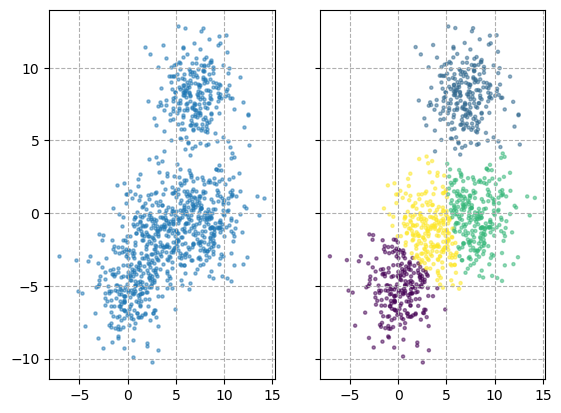

In [22]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs


X, y_label = make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=2)
# 这里的X就是样本点，而y是每个样本所属的分类，这里需要注意，X是一个多元变量
# 这个方法生成的是一个等方性混合高斯分布，centers设置生成多少个，n_features设置生成的单个高斯分布是几元高斯分布
# cluster_std可以设置每个分布的变量协方差
fig, ax = plt.subplots(1, 2, sharey='row') # 这个参数是让两个子图共享y轴的参数，并且按照行来共享
ax[0].scatter(X[:, 0], X[:, 1], s=5, alpha=0.5)
ax[0].grid(ls='--')

# 设置一个高斯混合模型，并且拟合得到的样本
gmm_model = GaussianMixture(n_components=4)
gmm_model.fit(X)
print('各分布的权重Pk：')
print(gmm_model.weights_)
print('各分布的均值mu')
print(gmm_model.means_)
print('各分布的协方差矩阵：')
print(gmm_model.covariances_)

print('样本点属于各分布的概率（不是Pk哦，取前10个样本）')
print(gmm_model.predict_proba(X)[:10].round(5)) # 保留5位

# 通过拟合好的GMM模型，生成预测的类别（其实就是上面的概率取最大值）
labels = gmm_model.predict(X) # 是不一样的方法，应该就是加了个取最大值
print('每个样本所属的类别')
print(labels)
ax[1].scatter(X[:, 0], X[:, 1], s=5, alpha=0.5, c=labels, cmap='viridis')
# c=labels, cmap='viridis'分别控制了颜色映射对应关系以及颜色映射的具体色号选取
ax[1].grid(ls='--')
plt.show()